In [1]:
from slsim.Sources.supernovae import delaytimedistribution
from slsim.Sources.supernovae import volumetricSNrate
from slsim.Sources.supernovae import supernovatotal
import numpy as np
x=np.arange(0,13.5,.5)
print(delaytimedistribution(x),"\n",volumetricSNrate(x),"\n",supernovatotal(x))

ModuleNotFoundError: No module named 'slsim.Sources.source_base'

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59]


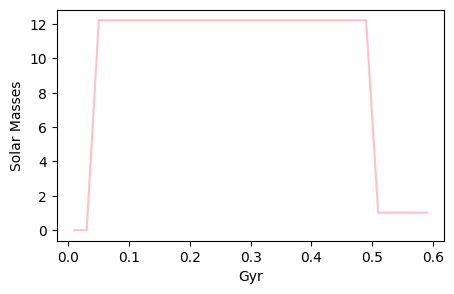

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59]


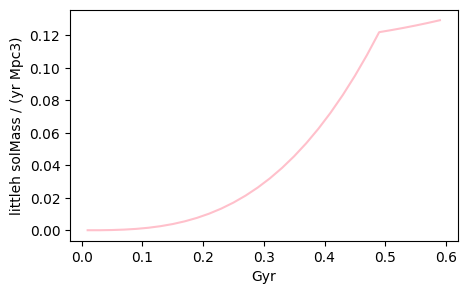

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59]


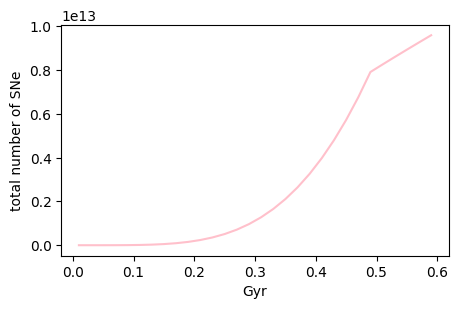

In [6]:
"graphing delay time distribution piecewise as a function of time"
from slsim.Sources.supernovae import delaytimedistribution
from slsim.Sources.supernovae import volumetricSNrate
from slsim.Sources.supernovae import supernovatotal
import numpy as np
import astropy.units as u
x=np.arange(.01,.6,.02)
print(x)
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
y=delaytimedistribution(x)
plt.xlabel('Gyr')
plt.ylabel('Solar Masses')
plt.plot(x, y, '-', color='pink')
plt.show()

z=np.arange(.01,.6,.02)
print(z)
plt.figure(figsize=(5,3))
y=volumetricSNrate(z)
plt.xlabel('Gyr')
plt.ylabel((u.solMass/u.yr*u.littleh/u.Mpc**3))
plt.plot(z, y, '-', color='pink')
plt.show()


t=np.arange(.01,.6,.02)
print(t)
plt.figure(figsize=(5,3))
y=supernovatotal(t)
plt.xlabel('Gyr')
plt.ylabel('total number of SNe')
plt.plot(t, y, '-', color='pink')
plt.show()
